In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
# def feature_extraction(file) :
  
#   mfcc_features = librosa.feature.mfcc(y=file,sr = sample_rate,n_mfcc = 40)
#   mfcc_scaled_feature = np.mean(mfcc_features.T,axis = 0)
#   return mfcc_scaled_feature

In [ ]:
# def extractMFCCS(data):
#   mfccs=np.mean(librosa.feature.mfcc(y=data,n_mfcc=35,sr=sample_rate).T,axis=0)
#   delta=librosa.feature.delta(mfccs)
#   delta2=librosa.feature.delta(mfccs,order=2)
#   tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(data), sr=sample_rate).T,axis=0)
#   chroma = librosa.feature.chroma_stft(y=data, sr=sample_rate)
#   mean_chroma=[]
#   for item in chroma:
#     mean_chroma.append(np.mean(item))
#   final_mfccs=np.concatenate((mfccs,delta,delta2,mean_chroma,tonnetz))
#   return final_mfccs
  

In [ ]:
# song="/content/drive/MyDrive/final year project/datas/TESS/YAF_neutral/YAF_should_neutral.wav"
# # data,sampling_rate=librosa.load(song)
# data, sample_rate = librosa.load(song, duration=2.5, offset=0.6)
# mf=extractMFCCS(data)
# print(len(mf))

In [3]:
#Importing The Dependecies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import IPython.display as ipd
from librosa.display import waveshow
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [5]:
# initiating directory path
CREME = '/content/drive/MyDrive/final year project/datas/CREME/'
rav = '/content/drive/MyDrive/final year project/datas/RAVDASS/'
TESS = '/content/drive/MyDrive/final year project/datas/TESS'

In [ ]:
import os

# loading CREME data, create list of emtions and path for audio files
emotion = []
path = []

# for loop to loop through directory
for i in os.listdir(CREME):
    if i.split('_')[-2] == 'FEA' :
        emotion.append('fear')
        path.append(CREME + i)
    elif i.split('_')[-2] == 'ANG' :
        emotion.append('angry')
        path.append(CREME + i)
    elif i.split('_')[-2] == 'DIS' :
        emotion.append('disgust')
        path.append(CREME + i)
    elif i.split('_')[-2] == 'HAP' :
        emotion.append('happy')
        path.append(CREME + i)
    elif i.split('_')[-2] == 'NEU' :
        emotion.append('neutral')
        path.append(CREME + i)
    elif i.split('_')[-2] == 'SAD' :
        emotion.append('sad')
        path.append(CREME + i)
        
# convertig it into dataframe
emotion_df = pd.DataFrame(emotion,columns = ['emotion'])
path_df = pd.DataFrame(path,columns = ['path'])
creme_df = pd.concat([emotion_df,path_df],axis = 1)

In [ ]:
creme_df.head()

,emotion,path
0,angry,/content/drive/MyDrive/final year project/data...
1,neutral,/content/drive/MyDrive/final year project/data...
2,fear,/content/drive/MyDrive/final year project/data...
3,disgust,/content/drive/MyDrive/final year project/data...
4,sad,/content/drive/MyDrive/final year project/data...


In [ ]:
# loading ravdess data

emotion = []
path = []

for i in os.listdir(rav) :
    # 20 actors in directory
    for aud in os.listdir(rav + i) :
        split = aud.split('.')[0].split('-')
        temp = int(split[2])
        
        if split[2] == '01' :
            emotion.append('neutral')
            path.append(rav + i +'/' + aud)
        if split[2] == '02' :
            emotion.append('calm')
            path.append(rav + i +'/' + aud)
        if split[2] == '03' :
            emotion.append('happy')
            path.append(rav + i +'/' + aud)
        if split[2] == '04' :
            emotion.append('sad')
            path.append(rav + i +'/' + aud)
        if split[2] == '05' :
            emotion.append('angry')
            path.append(rav + i +'/' + aud)
        if split[2] == '06' :
            emotion.append('fear')
            path.append(rav + i +'/' + aud)
        if split[2] == '07' :
            emotion.append('disgust')
            path.append(rav + i +'/' + aud)
        if split[2] == '08' :
            emotion.append('suprised')
            path.append(rav + i +'/' + aud)
            
# creating dataframe
emotion_df = pd.DataFrame(emotion,columns = ['emotion'])
path_df = pd.DataFrame(path,columns = ['path'])
rav_df = pd.concat([emotion_df,path_df],axis = 1)

In [ ]:
rav_df.head()

,emotion,path
0,angry,/content/drive/MyDrive/final year project/data...
1,happy,/content/drive/MyDrive/final year project/data...
2,calm,/content/drive/MyDrive/final year project/data...
3,sad,/content/drive/MyDrive/final year project/data...
4,neutral,/content/drive/MyDrive/final year project/data...


In [ ]:
# loading tess data

emotion = []
path = []

for i in os.listdir(TESS) :
  fname = os.listdir(TESS+"/"+ i) 
  for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry' :
            emotion.append('angry')
            path.append(TESS +"/"+ i + '/' + f)
        if i == 'OAF_disgust' or i == 'YAF_disgust' :
            emotion.append('disgust')
            path.append(TESS + "/"+i + '/' + f)
        if i == 'OAF_Fear' or i == 'YAF_fear' :
            emotion.append('fear')
            path.append(TESS + "/"+i + '/' + f)
        if i == 'OAF_happy' or i == 'YAF_happy' :
            emotion.append('happy')
            path.append(TESS + "/"+i + '/' + f)
        if i == 'OAF_neutral' or i == 'YAF_neutral' :
            emotion.append('neutral')
            path.append(TESS + "/"+i + '/' + f)
        if i == 'OAF_pleasant_surprise' or i == 'YAF_surprise' :
            emotion.append('surprise')
            path.append(TESS + "/"+i + '/' + f)
        if i == 'OAF_angry' or i == 'YAF_angry' :
            emotion.append('angry')
            path.append(TESS + "/"+i + '/' + f)
        if i == 'OAF_Sad' or i == 'YAF_sad' :
            emotion.append('sad')
            path.append(TESS +"/"+ i + '/' + f)
            
# creating dataframe
emotion_df = pd.DataFrame(emotion,columns = ['emotion'])
path_df = pd.DataFrame(path,columns = ['path'])
tess_df = pd.concat([emotion_df,path_df],axis = 1)

In [ ]:
tess_df.head()


,emotion,path
0,neutral,/content/drive/MyDrive/final year project/data...
1,neutral,/content/drive/MyDrive/final year project/data...
2,neutral,/content/drive/MyDrive/final year project/data...
3,neutral,/content/drive/MyDrive/final year project/data...
4,neutral,/content/drive/MyDrive/final year project/data...


In [ ]:
print(tess_df.iloc[1000,1])
print(tess_df.iloc[1,1])
print(tess_df.iloc[3,1])


/content/drive/MyDrive/final year project/datas/TESS/YAF_angry/YAF_cool_angry.wav
/content/drive/MyDrive/final year project/datas/TESS/OAF_neutral/OAF_perch_neutral.wav
/content/drive/MyDrive/final year project/datas/TESS/OAF_neutral/OAF_jug_neutral.wav


In [ ]:
audio_df  = pd.concat([
    creme_df,rav_df,tess_df
],axis = 0)

audio_df.reset_index(drop = 'index',inplace = True)

In [ ]:
audio_df

,emotion,path
0,angry,/content/drive/MyDrive/final year project/data...
1,neutral,/content/drive/MyDrive/final year project/data...
2,fear,/content/drive/MyDrive/final year project/data...
3,disgust,/content/drive/MyDrive/final year project/data...
4,sad,/content/drive/MyDrive/final year project/data...
...,...,...
11692,disgust,/content/drive/MyDrive/final year project/data...
11693,disgust,/content/drive/MyDrive/final year project/data...
11694,disgust,/content/drive/MyDrive/final year project/data...
11695,disgust,/content/drive/MyDrive/final year project/data...


In [ ]:
# saving audio_csv
audio_df.to_csv('audio.csv')

**Visualization**

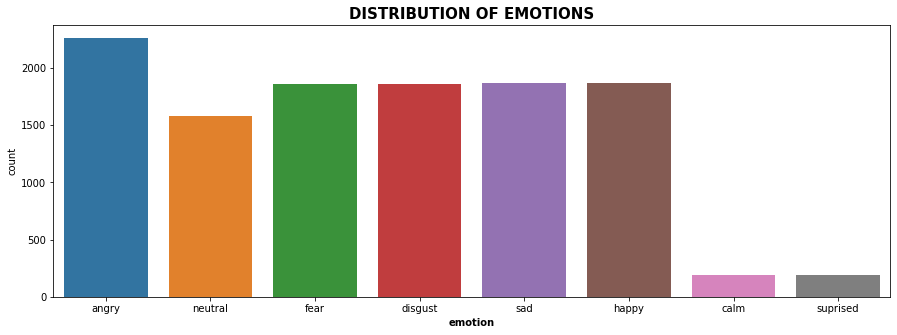

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = audio_df,x= 'emotion')
plt.title('DISTRIBUTION OF EMOTIONS',fontweight = 'bold',fontsize = 15)
plt.xlabel('emotion',fontweight = 'bold');

In [ ]:
def audio_visual(path,emotion) :
    data , sample_rate = librosa.load(path)
    plt.figure(figsize = (10,5))
    plt.title(f'Waveplot for audion with {emotion} emotions')
    waveshow(data,sample_rate)
    plt.show()
    
    return ipd.Audio(path)

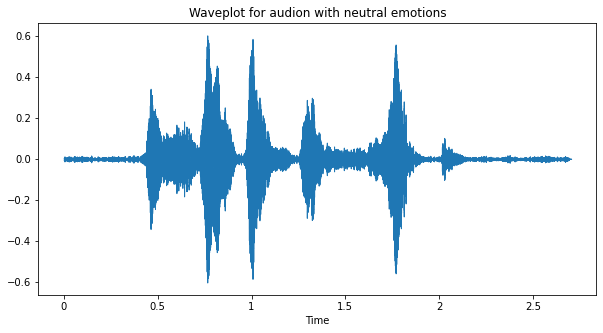

In [ ]:
# neutral
audio_visual(audio_df['path'][0],emotion = 'neutral')

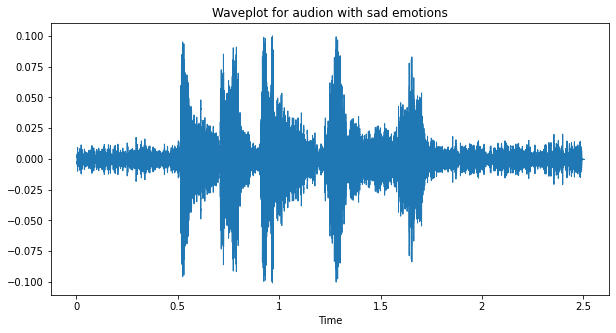

In [ ]:
# sad
audio_visual(audio_df['path'][1],emotion = 'sad')

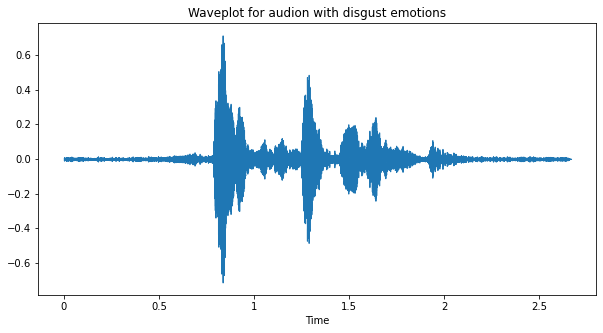

In [ ]:
# disgust
audio_visual(audio_df['path'][2],emotion = 'disgust')

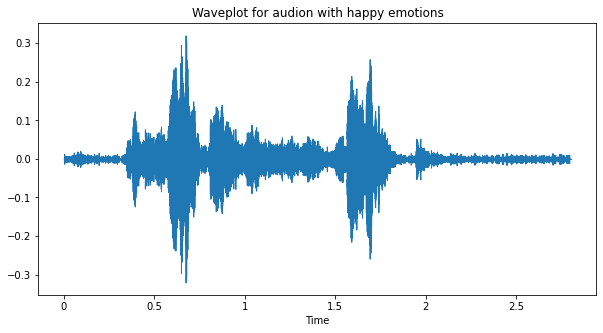

In [ ]:
# happy
audio_visual(audio_df['path'][3],emotion = 'happy')

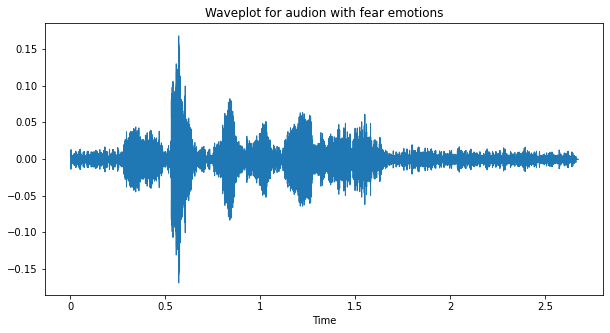

In [ ]:
# fear
audio_visual(audio_df['path'][4],emotion = 'fear')

## FEATURE EXTRACTION
 the data provided from audio cannot be understood by the models directly, so we need to convert them into an understandable format for which feature extraction is used. The audio signal is a three-dimensional signal in which three axes represent time, amplitude and frequency.

Looking at the waveplots above seems clear (from an eye test) that the waveform itself may not necessarily yield clear class identifying information. Infact they look quite similar.

It turns out one of the best tool to feature extract from audio waveforms ( and digital signal in general) is Mel Frequency Cepstral Coefficents (MFCCs). 

## Data Augmentation


In [21]:
def feature_extraction(data):
  mfccs=np.mean(librosa.feature.mfcc(y=data,n_mfcc=35,sr=sample_rate).T,axis=0)
  delta=librosa.feature.delta(mfccs)
  delta2=librosa.feature.delta(mfccs,order=2)
  tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(data), sr=sample_rate).T,axis=0)
  chroma = librosa.feature.chroma_stft(y=data, sr=sample_rate)
  mean_chroma=[]
  for item in chroma:
    mean_chroma.append(np.mean(item))
  final_mfccs=np.concatenate((mfccs,delta,delta2,mean_chroma,tonnetz))
  return final_mfccs
  

  # NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data
# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)
# higher speed
def higher_speed(data, speed_factor = 1.25):
    return librosa.effects.time_stretch(data, speed_factor)
# lower speed
def lower_speed(data, speed_factor = 0.75):
    return librosa.effects.time_stretch(data, speed_factor)

In [ ]:
# Trying different functions above
path = np.array(audio_df['path'])[471]
data, sample_rate = librosa.load(path)

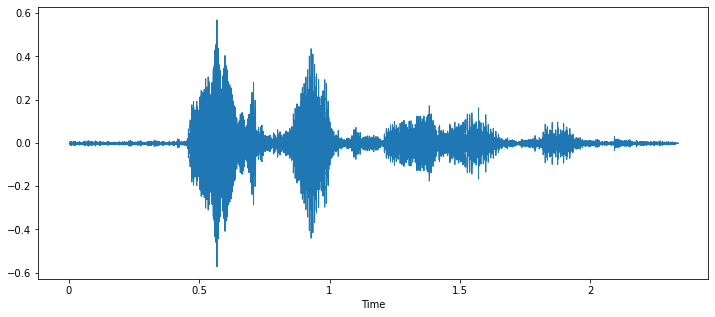

In [ ]:
# NORMAL AUDIO


import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sample_rate)
ipd.Audio(path)

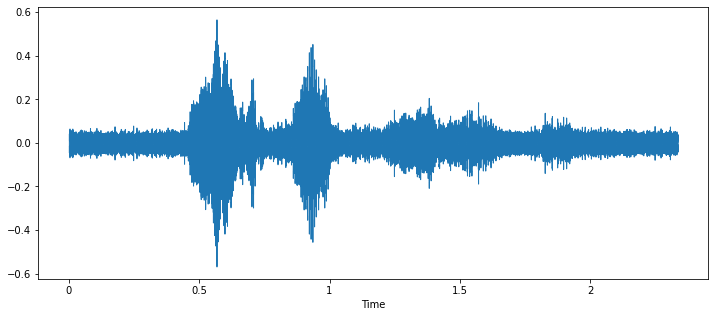

In [ ]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

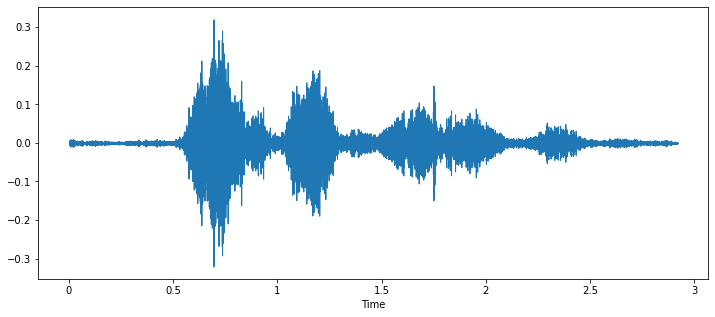

In [ ]:
# STRETCHED AUDIO
x = stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

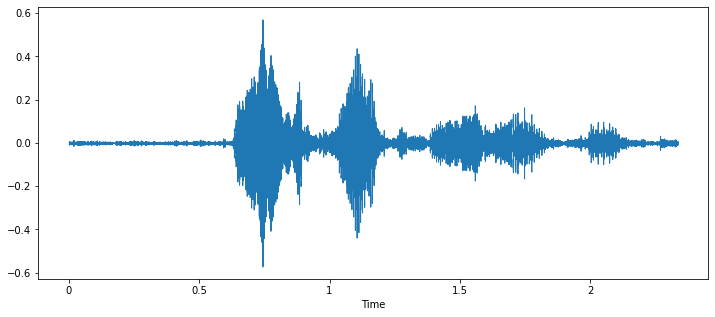

In [ ]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

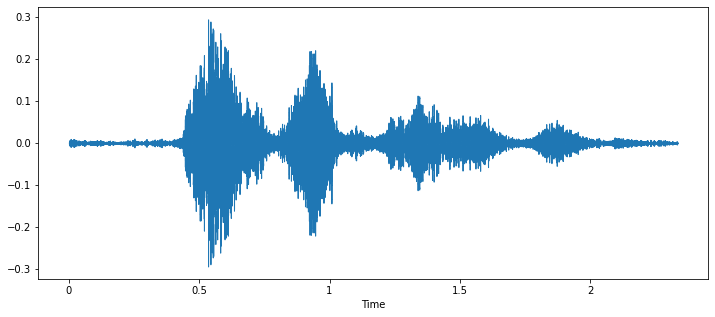

In [ ]:
# AUDIO WITH PITCH
x = pitch(data, sample_rate)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

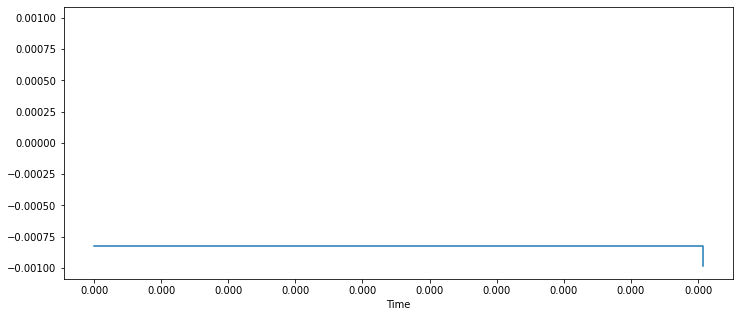

In [ ]:
# AUDIO WITH high speed
x = higher_speed(data, sample_rate)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

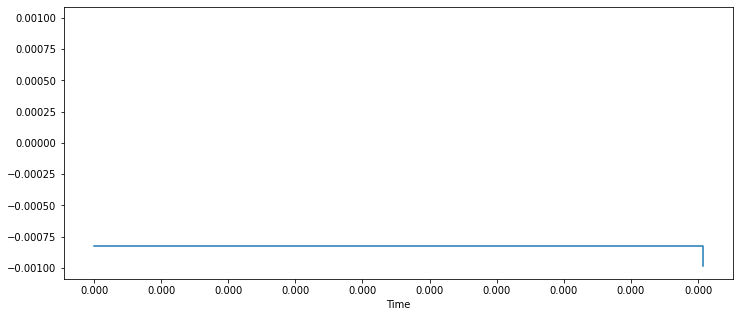

In [ ]:
x = lower_speed(data, sample_rate)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

In [20]:
def get_feat(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    # normal data
    res1 = feature_extraction(data)
    result = np.array(res1)
    #data with noise
    noise_data = noise(data)
    res2 = feature_extraction(noise_data)
    result = np.vstack((result, res2))
    #data with stretch and pitch
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = feature_extraction(data_stretch_pitch)
    result = np.vstack((result, res3))
    # data with high speed
    high_speed = higher_speed(data)
    res4 = feature_extraction(high_speed)
    result = np.vstack((result,res4))
    # data with low speed
    low_speed = lower_speed(data)
    res5 = feature_extraction(high_speed)
    result = np.vstack((result,res5))
    return result


In [ ]:
from tqdm import tqdm
x = []
y = []

for path,emotion in tqdm(zip(audio_df['path'],audio_df['emotion'])) :
   feature = get_feat(path)
   for ele in feature :
     x.append(ele)
     y.append(emotion)

In [ ]:
Emotions = pd.DataFrame(x)
Emotions['labels'] = y
Emotions.to_csv('/content/drive/MyDrive/final year project/finalFeatureEmotion.csv', index=False)

NameError: ignored

In [4]:
Emotions= pd.read_csv('/content/drive/MyDrive/final year project/finalFeatureEmotion.csv')


In [5]:
Emotions.tail(37295)

,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,labels
21190,-455.297089,154.547073,8.507237,62.203323,-24.189383,30.050652,-13.133221,10.605529,-9.152669,2.132672,...,0.670606,0.697236,0.408712,0.010933,-0.007152,-0.022826,-0.015316,0.009454,0.011652,fear
21191,-340.431440,60.515009,38.292767,22.423327,9.690992,5.906981,5.486806,1.114227,-1.122217,0.732521,...,0.685757,0.702407,0.441120,0.006872,-0.012565,-0.017462,-0.011571,0.010897,0.007976,fear
21192,-517.082397,145.348541,14.317773,53.769482,-19.703634,27.661726,-12.978257,9.594703,-11.039946,6.382909,...,0.384657,0.619074,0.681676,-0.040005,0.000587,0.019174,-0.065854,0.043603,-0.028469,fear
21193,-490.037384,156.448578,6.026458,62.382484,-26.683937,30.475674,-13.751095,11.382611,-9.769345,1.622970,...,0.653054,0.543268,0.388911,-0.013352,0.027803,-0.011562,-0.027166,0.012453,0.011740,fear
21194,-490.037384,156.448578,6.026458,62.382484,-26.683937,30.475674,-13.751095,11.382611,-9.769345,1.622970,...,0.653054,0.543268,0.388911,-0.013352,0.027803,-0.011562,-0.027166,0.012453,0.011740,fear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58480,-517.817078,111.077431,13.384596,-10.642900,6.986814,10.279251,-2.432660,12.193850,-19.376772,4.720012,...,0.305729,0.360572,0.263660,-0.057495,0.049514,0.011824,-0.096506,-0.021319,0.029437,disgust
58481,-468.105834,82.101553,12.938410,-6.170036,3.545394,5.536543,1.700162,6.388154,-11.644736,-1.187315,...,0.309129,0.364347,0.269524,-0.041946,0.049601,0.000043,-0.098055,-0.024233,0.025521,disgust
58482,-568.796570,105.106071,8.590608,-13.829614,7.367247,5.500224,-0.701399,4.816365,-21.317057,3.233722,...,0.224358,0.298981,0.302337,-0.039714,0.020092,0.080854,-0.016618,0.028618,0.021120,disgust
58483,-536.424377,117.715576,11.882184,-14.592521,5.665749,9.290629,-2.952672,12.036922,-20.400137,4.696112,...,0.333379,0.343732,0.272961,0.004390,0.052256,-0.021656,-0.118207,-0.028681,0.021487,disgust


## DATA PREPROCESSING


In [6]:
X = Emotions.drop('labels',axis = 1)
Y = Emotions['labels']
pd.set_option('expand_frame_repr', False)
# print(X.head(4))
print(Y.unique())



['angry' 'neutral' 'fear' 'disgust' 'sad' 'happy' 'calm' 'suprised']


In [7]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
inverted = argmax(Y[100])
print(inverted)

0


In [8]:
# since it is a multiclass classifier, i will perform onehotencoding
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [12]:
Emotions['labels'].head(10
                        )

0      angry
1      angry
2      angry
3      angry
4      angry
5    neutral
6    neutral
7    neutral
8    neutral
9    neutral
Name: labels, dtype: object

In [16]:
Y[0]
#6=sad
#0=angry
#1=disgust
#5=neutral
#4=fear
#3=happy
# =calm
# =surprise



array([1., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.20,shuffle = True)

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((46788, 123), (46788, 8), (11697, 123), (11697, 8))

In [15]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((46788, 123), (46788, 8), (11697, 123), (11697, 8))

In [16]:
# decision tree 
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
y_pred = clf.predict(x_test)

In [18]:
type(x_test[0])

numpy.ndarray

/usr/local/lib/python3.8/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=862
  warnings.warn(


In [19]:
print(f'the training score for decision tree is {clf.score(x_train,y_train)}')

the training score for decision tree is 0.9996580319740104


In [20]:
print(f'the test score for decision tree is {clf.score(x_test,y_test)}')

the test score for decision tree is 0.6636744464392579


After Using the decision tree model in our dataset then the model goes in overfitting he gave accuracy around .66


## MLP CLASSIFIER

In [21]:
from sklearn.neural_network import MLPClassifier
clf2=MLPClassifier(alpha=0.01, batch_size=270, epsilon=1e-08, hidden_layer_sizes=(400,), learning_rate='adaptive', max_iter=400)
clf2.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(alpha=0.01, batch_size=270, hidden_layer_sizes=(400,),
              learning_rate='adaptive', max_iter=400)

In [22]:
print(f"Training set score: {(clf2.score(x_train, y_train))}")
print(f"Test set score: {(clf2.score(x_test, y_test))}")

Training set score: 0.8541078909121997
Test set score: 0.662392066341797


## CNN


In [17]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D,Dense,AveragePooling1D,Dropout,add,BatchNormalization,LSTM,Flatten,MaxPooling1D,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu, softmax
from keras.activations import relu, softmax
from sklearn.metrics import confusion_matrix,classification_report

In [24]:

#CNN
x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape

((46788, 123, 1), (46788, 8), (11697, 123, 1), (11697, 8))

In [25]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=2,)

In [26]:
my_model=Sequential()
my_model.add(Conv1D(256, kernel_size=7, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())

my_model.add(Conv1D(128, kernel_size=7, strides=1, padding='same', activation='relu'))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())


my_model.add(Conv1D(64, kernel_size=7, strides=1, padding='same', activation='relu'))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())
my_model.add(Dropout(0.5))
        
my_model.add(Flatten())
my_model.add(Dense(units=32, activation='relu'))
my_model.add(Dropout(0.5))

my_model.add(Dense(units=8, activation='softmax'))
my_model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 123, 256)          2048      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 62, 256)          0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 62, 256)          1024      
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 62, 128)           229504    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 31, 128)          0         
 1D)                                                             
                                                        

In [27]:
from keras.callbacks import ReduceLROnPlateau
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history = my_model.fit(x_traincnn, y_train, batch_size=32, epochs=50, validation_data=(x_testcnn, y_test),callbacks = [early_stopping,rlrp])

Epoch 1/50
1463/1463 [==============================] - 28s 9ms/step - loss: 1.5069 - accuracy: 0.4091 - val_loss: 1.1851 - val_accuracy: 0.5171 - lr: 0.0010
Epoch 2/50
1463/1463 [==============================] - 13s 9ms/step - loss: 1.2895 - accuracy: 0.4736 - val_loss: 1.1236 - val_accuracy: 0.5352 - lr: 0.0010
Epoch 3/50
1463/1463 [==============================] - 14s 10ms/step - loss: 1.2411 - accuracy: 0.4927 - val_loss: 1.0945 - val_accuracy: 0.5654 - lr: 0.0010
Epoch 4/50
1463/1463 [==============================] - 13s 9ms/step - loss: 1.1973 - accuracy: 0.5088 - val_loss: 1.0755 - val_accuracy: 0.5760 - lr: 0.0010
Epoch 5/50
1463/1463 [==============================] - 13s 9ms/step - loss: 1.1672 - accuracy: 0.5264 - val_loss: 1.0320 - val_accuracy: 0.5990 - lr: 0.0010
Epoch 6/50
1463/1463 [==============================] - 13s 9ms/step - loss: 1.1408 - accuracy: 0.5354 - val_loss: 1.0117 - val_accuracy: 0.6036 - lr: 0.0010
Epoch 7/50
1463/1463 [=============================

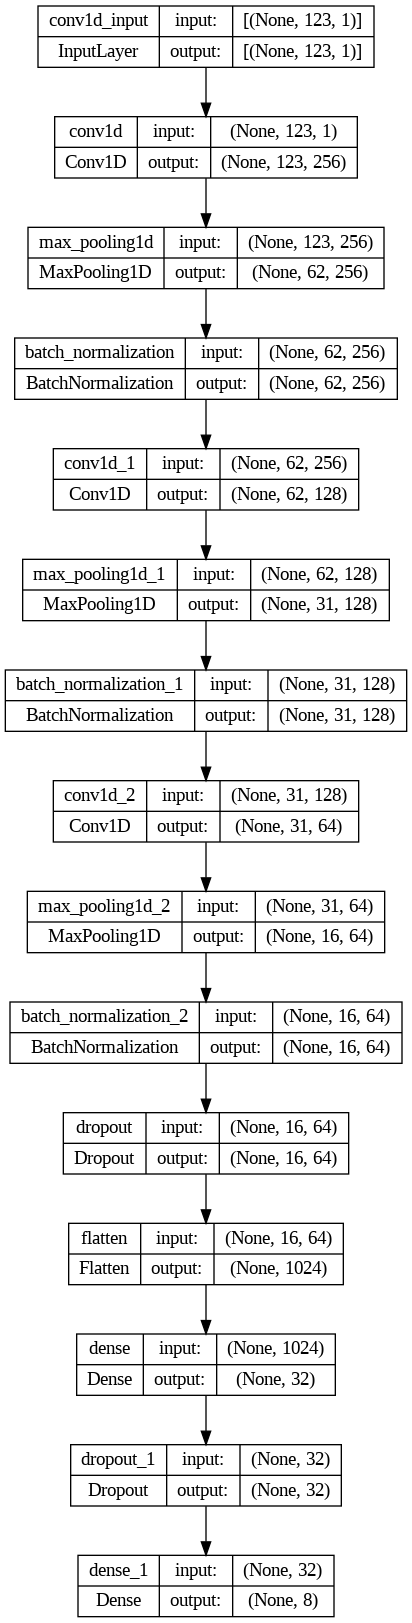

In [28]:
# Visualize the model
from keras.utils.vis_utils import plot_model
plot_model(my_model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

In [33]:
print("Accuracy of our model on test data : " , my_model.evaluate(x_testcnn,y_test) , "%")

366/366 [==============================] - 2s 4ms/step - loss: 0.6044 - accuracy: 0.7874
Accuracy of our model on test data :  [0.604350745677948, 0.7873813509941101] %


In [ ]:
# x = model.predict()


In [ ]:
# print(x.shape)
type(x_testcnn)
print(x_testcnn[0])
# y = [[1,2,3,4] , [4,88,4,3]]
# import numpy as np
# for items in x:
#     print(np.argmax(items))


In [ ]:
x


In [ ]:
data

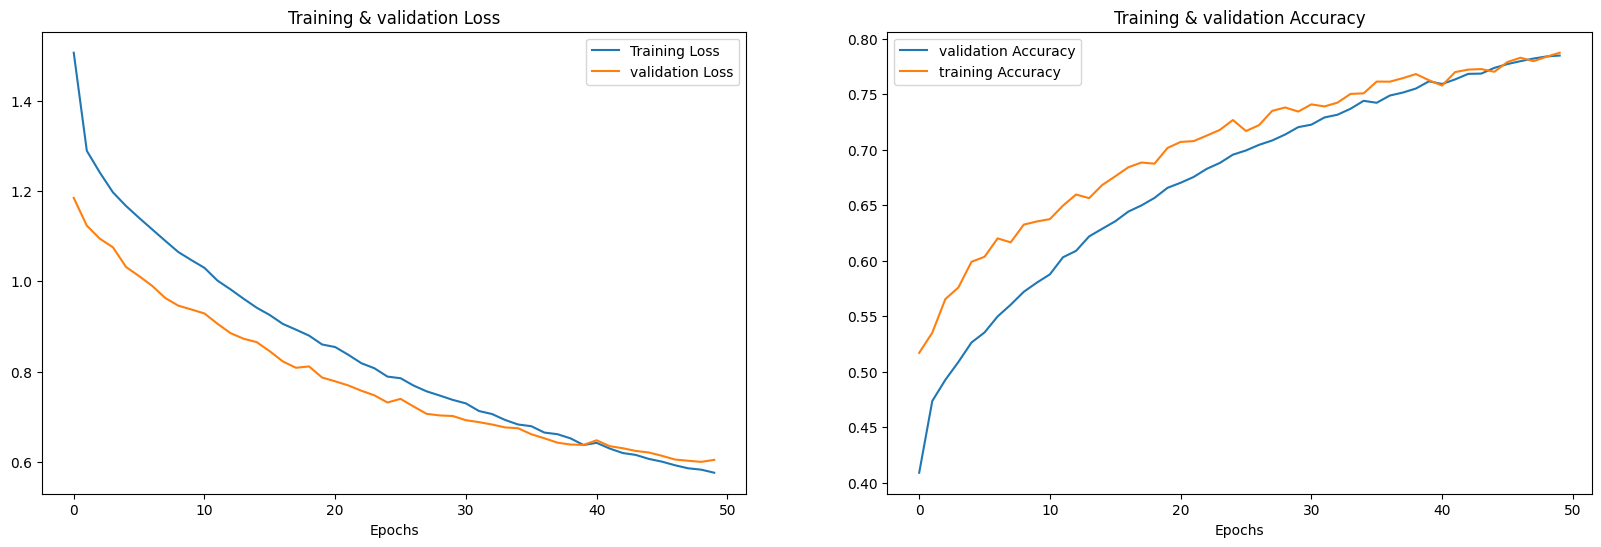

In [34]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'validation Loss')
ax[0].set_title('Training & validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'validation Accuracy')
ax[1].plot(epochs , test_acc , label = 'training Accuracy')
ax[1].set_title('Training & validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

## Confusion Matrix


In [35]:
# predicting on test data.
pred_test = my_model.predict(x_testcnn)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)

366/366 [==============================] - 1s 2ms/step


In [36]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

In [37]:
df

,Predicted Labels,Actual Labels
0,happy,happy
1,disgust,angry
2,fear,fear
3,sad,happy
4,disgust,disgust
...,...,...
11692,fear,fear
11693,angry,angry
11694,happy,happy
11695,neutral,neutral


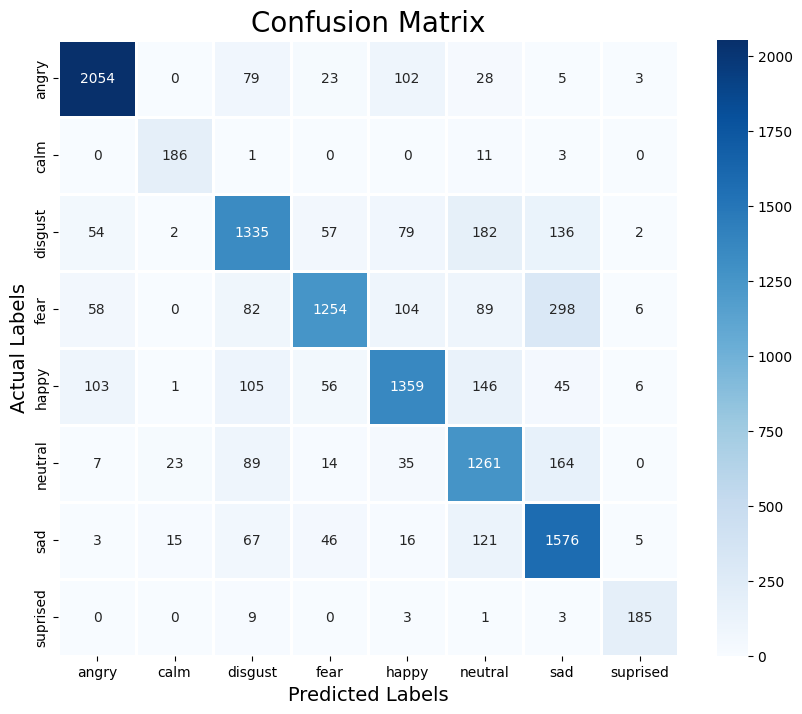

In [38]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10, 8))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

Classification report

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.90      0.90      0.90      2294
        calm       0.82      0.93      0.87       201
     disgust       0.76      0.72      0.74      1847
        fear       0.86      0.66      0.75      1891
       happy       0.80      0.75      0.77      1821
     neutral       0.69      0.79      0.73      1593
         sad       0.71      0.85      0.77      1849
    suprised       0.89      0.92      0.91       201

    accuracy                           0.79     11697
   macro avg       0.80      0.81      0.81     11697
weighted avg       0.80      0.79      0.79     11697



* Our has a good precision and recall score across all labels
* We overall achieved 79-82% accuracy on our test data and its very decent but we can improve it more by applying more augmentation techniques and using other feature extraction methods.

In [ ]:
# ## saving model
# import os
# from datetime import datetime
# def save_model(model , suffix = None) :
#   modeldir = os.path.join('/content/drive/MyDrive/final year project',datetime.now().strftime('%Y%m%d-%H%M%S'))
#   modelpath = modeldir + '-' + suffix + '.h5'
#   print(f'saving model into {modelpath}')
#   model.save(modelpath)
#   return modelpath

In [ ]:
# save_model(my_model,suffix = 'speech_emotion_recognition_model')

In [41]:
path='/content/drive/MyDrive/final year project/fed.h5'
my_model.save(path)

In [ ]:
import pickle
import os
from datetime import datetime
def save_model(model , suffix = None) :
  modeldir = os.path.join('/content/drive/MyDrive/final year project',datetime.now().strftime('%Y%m%d-%H%M%S'))
  modelpath = modeldir + '-' + suffix + '.pkl'
  print(f'saving model into {modelpath}')
  with open(modelpath, 'wb') as file:
    pickle.dump(model, file)
save_model(my_model,suffix = 'speech_emotion_recognition_model') 

load the saved model

In [18]:
import pickle
import os
import keras
from datetime import datetime
filename ='/content/drive/MyDrive/final year project/fed.h5'
# filename="/content/drive/MyDrive/final year project/h5Model.h5"
# with open(filename, 'rb') as file:
#     model = pickle.load(file)
model = keras.models.load_model(filename)

In [64]:
# song="/content/drive/MyDrive/final year project/datas/CREME/1001_IEO_ANG_MD.wav"#neutral 
# song="/content/drive/MyDrive/final year project/datas/RAVDASS/Actor_24/03-01-04-02-02-01-24.wav" #(surprised 9% +sad,use this too)
# song="/content/drive/MyDrive/final year project/datas/emodv/16b01Eb.wav"
# song ="/content/drive/MyDrive/final year project/datas/TESS/OAF_Fear/OAF_bar_fear.wav"
# song="/content/drive/MyDrive/final year project/datas/TESS/OAF_Fear/OAF_gap_fear.wav"
# song="/content/drive/MyDrive/final year project/datas/TESS/OAF_happy/OAF_name_happy.wav"#partially
# song="/content/drive/MyDrive/final year project/datas/TESS/OAF_happy/OAF_rain_happy.wav"
# song="/content/drive/MyDrive/final year project/datas/TESS/OAF_happy/OAF_shall_happy.wav" #happy
# song="/content/drive/MyDrive/final year project/datas/TESS/OAF_happy/OAF_tip_happy.wav"
# song="/content/drive/MyDrive/final year project/datas/TESS/OAF_happy/OAF_young_happy.wav" # true happy(passed)
# song="/content/drive/MyDrive/final year project/datas/TESS/YAF_neutral/YAF_back_neutral.wav"
# song="/content/drive/MyDrive/final year project/datas/TESS/YAF_disgust/YAF_base_disgust.wav"
# song="/content/drive/MyDrive/final year project/datas/TESS/YAF_disgust/YAF_fail_disgust.wav"
# song="/content/drive/MyDrive/final year project/datas/TESS/YAF_pleasant_surprised/YAF_back_ps.wav"
# song="/content/drive/MyDrive/final year project/datas/TESS/YAF_pleasant_surprised/YAF_doll_ps.wav" #(surprise +happy)
# song="/content/drive/MyDrive/final year project/datas/TESS/OAF_angry/OAF_base_angry.wav"
# song="/content/drive/MyDrive/final year project/datas/TESS/OAF_angry/OAF_far_angry.wav" #angry 4%
# song="/content/drive/MyDrive/final year project/datas/RAVDASS/Actor_01/03-01-02-01-01-01-01.wav" #neutral pass
# song="/content/drive/MyDrive/final year project/datas/RAVDASS/Actor_23/03-01-01-01-01-02-23.wav" #neutral
# song="/content/drive/MyDrive/final year project/datas/RAVDASS/Actor_08/03-01-03-01-01-01-08.wav"#happy 16%
# song="/content/drive/MyDrive/final year project/datas/RAVDASS/Actor_08/03-01-03-02-01-02-08.wav"
# song="/content/drive/MyDrive/final year project/datas/RAVDASS/Actor_08/03-01-04-01-02-02-08.wav"
# song="/content/drive/MyDrive/final year project/datas/RAVDASS/Actor_08/03-01-04-02-02-01-08.wav"#sad 15%
# song="/content/drive/MyDrive/final year project/datas/RAVDASS/Actor_08/03-01-05-01-01-02-08.wav"
# song="/content/drive/MyDrive/final year project/datas/RAVDASS/Actor_08/03-01-08-01-01-02-08.wav"
# song="/content/drive/MyDrive/final year project/datas/RAVDASS/Actor_10/03-01-02-01-02-02-10.wav" # calm 6%(change the code)
# song="/content/drive/MyDrive/final year project/datas/RAVDASS/Actor_10/03-01-05-02-01-02-10.wav"
# song="/content/drive/MyDrive/final year project/datas/RAVDASS/Actor_10/03-01-05-02-02-02-10.wav"
# song="/content/drive/MyDrive/final year project/datas/RAVDASS/Actor_10/03-01-05-01-02-01-10.wav" #angry 5%
# song="/content/drive/MyDrive/final year project/datas/RAVDASS/Actor_10/03-01-05-02-02-01-10.wav"  #angry 4%
# song="/content/drive/MyDrive/final year project/datas/RAVDASS/Actor_17/03-01-02-01-01-01-17.wav"  #calm 6%
# song="/content/drive/MyDrive/final year project/datas/RAVDASS/Actor_17/03-01-02-01-01-02-17.wav"  #calm 6%
# song="/content/drive/MyDrive/final year project/datas/RAVDASS/Actor_17/03-01-08-02-02-02-17.wav"  #surprise 9%
# song="/content/drive/MyDrive/final year project/datas/RAVDASS/Actor_17/03-01-08-02-01-01-17.wav"    #surprise 10%
# song="/content/drive/MyDrive/final year project/datas/RAVDASS/Actor_17/03-01-08-01-02-02-17.wav"  #surprise 10%
song="/content/drive/MyDrive/final year project/datas/RAVDASS/Actor_17/03-01-08-01-01-02-17.wav"  #surprised 10%
#i did up to here

from IPython.display import Audio, display
display(Audio(song, autoplay=True))
data, sample_rate = librosa.load(song, duration=2.5, offset=0.6)
mfcc=feature_extraction(data)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (-1,1))
mfcc = np.array(mfcc).reshape(-1 , 1)
mfcc =  scaler.fit_transform(mfcc)
mfcc = mfcc.reshape(1 , 123 ,1)
prediction =  model.predict(mfcc)
# print(prediction.argmax())
for item in prediction:
  pass

# conditionalProbability=prediction.flatten() #converting 2D array to 1D array
# if(conditionalProbability[2]>0.20 or conditionalProbability[3]>0.20):
#   print("happy :)")

# emotions=["angry","disgust","surprise","happy","fear","neutral","sad","calm"]
emotions=['angry','calm','disgust','fear','happy','neutral','sad','suprised']  
emotionPrediction=zip(emotions,item)


for emotion,item in emotionPrediction:
  print(str(emotion)+":"+str(int(item*100))+"%")



1/1 [==============================] - 0s 28ms/step
angry:3%
calm:6%
disgust:17%
fear:13%
happy:16%
neutral:17%
sad:15%
suprised:10%


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=862
  warnings.warn(


In [ ]:
  # if split[2] == '01' :
  #           emotion.append('neutral')
  #           path.append(rav + i +'/' + aud)
  #       if split[2] == '02' :
  #           emotion.append('calm')
  #           path.append(rav + i +'/' + aud)
  #       if split[2] == '03' :
  #           emotion.append('happy')
  #           path.append(rav + i +'/' + aud)
  #       if split[2] == '04' :
  #           emotion.append('sad')
  #           path.append(rav + i +'/' + aud)
  #       if split[2] == '05' :
  #           emotion.append('angry')
  #           path.append(rav + i +'/' + aud)
  #       if split[2] == '06' :
  #           emotion.append('fear')
  #           path.append(rav + i +'/' + aud)
  #       if split[2] == '07' :
  #           emotion.append('disgust')
  #           path.append(rav + i +'/' + aud)
  #       if split[2] == '08' :
  #           emotion.append('suprised')
  #           path.append(rav + i +'/' + aud)

In [55]:
for i in encoder.categories_:
  print(i)
#6=sad
#0=angry
#1=disgust
#5=neutral
#4=fear
#3=happy
#2=calm
#7=surprise


['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'suprised']


In [ ]:

filename = '/content/drive/MyDrive/final year project/20230303-071307-speech_emotion_recognition_model.pkl'
with open(filename, 'rb') as file:
    model = pickle.load(file)

In [ ]:
def feature_extraction(file) :
  data, sample_rate = librosa.load(file, duration=2.5, offset=0.6)
  mfcc_features = librosa.feature.mfcc(y=file,sr = sample_rate,n_mfcc = 40)
  mfcc_scaled_feature = np.mean(mfcc_features.T,axis = 0)
  return mfcc_scaled_feature

In [ ]:
emotions={1:'neutral',2:'calm',3:'happy',4:'sad',5:'angry',6:'fearful',7:'disgust',8:'surprised'}
def predict(audio_file):

  data, sample_rate = librosa.load(audio_file, duration=2.5, offset=0.6)
  res1 = feature_extraction(data)
  result = np.array(res1)
  test_point=np.reshape(result,newshape=(1,40,1))
  prediction=model.predict(test_point)
predict("/content/drive/MyDrive/final year project/datas/TESS/OAF_Fear/OAF_back_fear.wav")